In [1]:
import lzma
import pickle
import numpy as np
from tqdm import trange, tqdm
import matplotlib.pyplot as plt
from scipy import stats
import statistics

In [2]:
with lzma.open("./data/services_dict.xz","rb") as f:
    services_dict = pickle.load(f)

In [6]:
service_sizes = np.zeros((len(services_dict),1))
for i in trange(len(services_dict)):
    service_sizes[i] = len(services_dict[list(services_dict.keys())[i]])

  0%|          | 59/12458816 [00:22<1342:14:58,  2.58it/s]


KeyboardInterrupt: 

In [9]:
lengths = {key: len(value) for key, value in services_dict.items()}
lengths = list(lengths.values())

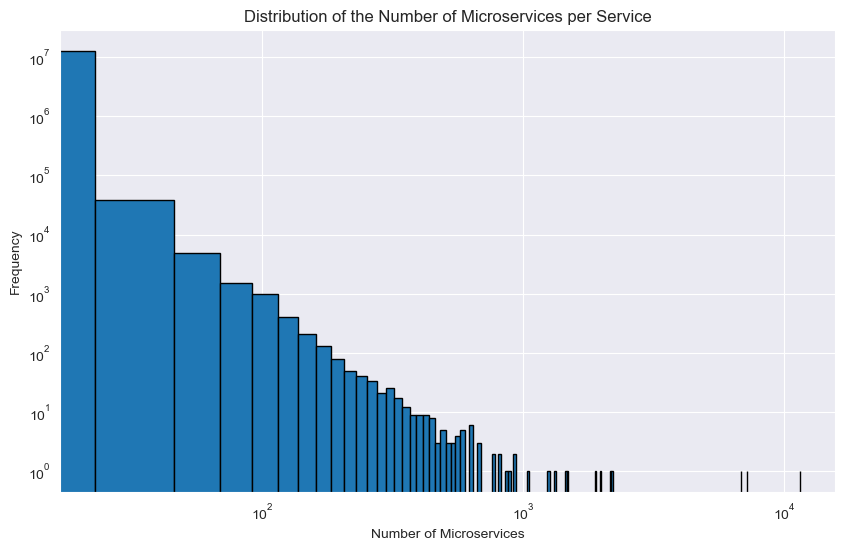

In [10]:
# Create a histogram of the lengths
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.hist(np.array(lengths), bins=500, range=(0, 11497), edgecolor='black')  # 50 bins
plt.title('Distribution of the Number of Microservices per Service')
plt.xlabel('Number of Microservices')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
# plt.grid(True)
plt.show()

In [11]:
print(f"Mean: {np.mean(lengths)}")
print(f"Median: {statistics.median(lengths)}")
print(f"Mode: {stats.mode(lengths)[0]}")

Mean: 4.055470279037752
Median: 4.0
Mode: 4


In [12]:
# Using defaultdict to automatically handle missing keys
from collections import defaultdict
inverted_dict = defaultdict(list)

for service, microservices in tqdm(services_dict.items()):
    for micro in microservices:
        inverted_dict[micro].append(service)
inverted_dict = dict(inverted_dict)

100%|██████████| 12458816/12458816 [00:10<00:00, 1232373.31it/s]


In [13]:
# Remove entries that are not microservices
inverted_dict.pop('UNAVAILABLE')
inverted_dict.pop('USER')
inverted_dict.pop('UNKNOWN')

ms_services = {key: len(value) for key, value in inverted_dict.items()}
ms_services = np.array(list(ms_services.values()))

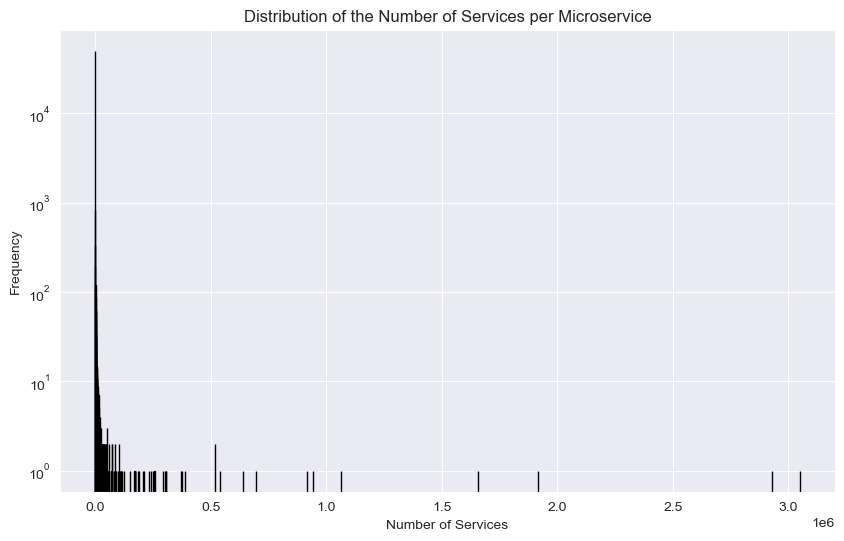

In [14]:
# Create a histogram of the lengths
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.hist(ms_services, bins=10000, range=(0, np.max(ms_services)), edgecolor='black')  # 50 bins
plt.title('Distribution of the Number of Services per Microservice')
plt.xlabel('Number of Services')
plt.ylabel('Frequency')
plt.yscale('log')
# plt.xscale('log')
# plt.grid(True)
plt.show()

In [15]:
print(f"Mean: {np.mean(ms_services)}")
print(f"Median: {statistics.median(lengths)}")
print(f"Mode: {stats.mode(ms_services)[0]}")

Mean: 588.997441388852
Median: 4.0
Mode: 1


In [16]:
print(f"{len(np.where(ms_services == 1)[0])} ({len(np.where(ms_services == 1)[0])/len(ms_services)*100}%)")
print(f"{len(np.where(ms_services > 1)[0])} ({len(np.where(ms_services > 1)[0])/len(ms_services)*100}%)")
print(f"{len(np.where(ms_services > 10)[0])} ({len(np.where(ms_services > 10)[0])/len(ms_services)*100}%)")
print(f"{len(np.where(ms_services > 100)[0])} ({len(np.where(ms_services > 100)[0])/len(ms_services)*100}%)")

10487 (19.875670450884144%)
42276 (80.12432954911586%)
21832 (41.37748043136288%)
5340 (10.12072854083354%)


52763

In [6]:
services_dict['S_31449261']

['MS_52924',
 'MS_58269',
 'MS_52845',
 'MS_25648',
 'MS_25557',
 'MS_31140',
 'MS_40687',
 'USER',
 'MS_54016',
 'MS_36285',
 'MS_34321',
 'MS_54776',
 'MS_64950',
 'MS_7167',
 'MS_27096',
 'MS_3011',
 'MS_12868',
 'MS_13170',
 'MS_36344',
 'MS_37',
 'MS_9076',
 'MS_72770',
 'MS_8204',
 'MS_15350',
 'MS_62962',
 'MS_43457',
 'MS_55224',
 'MS_23903',
 'UNAVAILABLE',
 'MS_42076',
 'MS_23759',
 'MS_70252',
 'MS_71764',
 'MS_27421',
 'MS_36525',
 'MS_56481',
 'MS_69763',
 'MS_62858',
 'MS_44399',
 'MS_51571',
 'MS_11097',
 'MS_2531',
 'MS_42466',
 'MS_60125',
 'MS_8106',
 'MS_69546',
 'MS_33333',
 'MS_31994',
 'MS_66797',
 'MS_61539',
 'MS_55101',
 'MS_46429',
 'MS_40401',
 'MS_72835',
 'MS_4810',
 'MS_58845',
 'MS_19932',
 'MS_1642',
 'UNKNOWN',
 'MS_4797',
 'MS_65250',
 'MS_40972']